In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix 
from sklearn.datasets import make_blobs

In [2]:
df_linear_train=pd.read_csv("linear_train.txt")
df_linear_train.to_csv("linear_train.csv",index=None)
df_linear_train.columns=['X1','X2','Class']

df_linear_test=pd.read_csv("linear_dev.txt")
df_linear_test.to_csv("linear_dev.csv",index=None)
df_linear_test.columns=['X1','X2','Class']

df_Nonlinear_train=pd.read_csv("train.txt")
df_Nonlinear_train.to_csv("train.csv",index=None)
df_Nonlinear_train.columns=['X1','X2','Class']

df_Nonlinear_test=pd.read_csv("dev.txt")
df_Nonlinear_test.to_csv("dev.csv",index=None)
df_Nonlinear_test.columns=['X1','X2','Class']


print(df_linear_train)


           X1       X2  Class
0     6.33650   4.4095      1
1     5.22390   2.2515      1
2     0.80325   1.8560      1
3     3.12320   2.5948      1
4     4.23330   4.3434      1
...       ...      ...    ...
1045 -0.96394  13.2300      3
1046  1.60120  12.3450      3
1047  1.05160  11.9700      3
1048 -1.43640  11.1920      3
1049  0.78714   9.1914      3

[1050 rows x 3 columns]


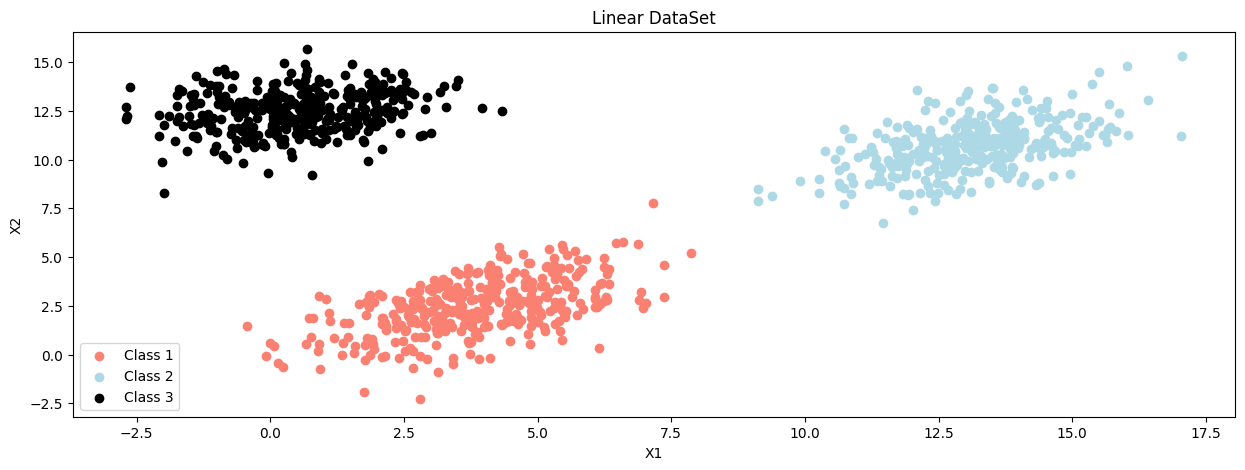

In [3]:
# Create another figure
plt.figure(figsize=(15, 5))

plt.scatter(df_linear_train.X1[df_linear_train.Class==1],
            df_linear_train.X2[df_linear_train.Class==1],
            c="salmon")
plt.scatter(df_linear_train.X1[df_linear_train.Class==2],
            df_linear_train.X2[df_linear_train.Class==2],
            c="lightblue")
plt.scatter(df_linear_train.X1[df_linear_train.Class==3],
            df_linear_train.X2[df_linear_train.Class==3],
            c="black")

plt.title("Linear DataSet")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(["Class 1", "Class 2","Class 3"]);

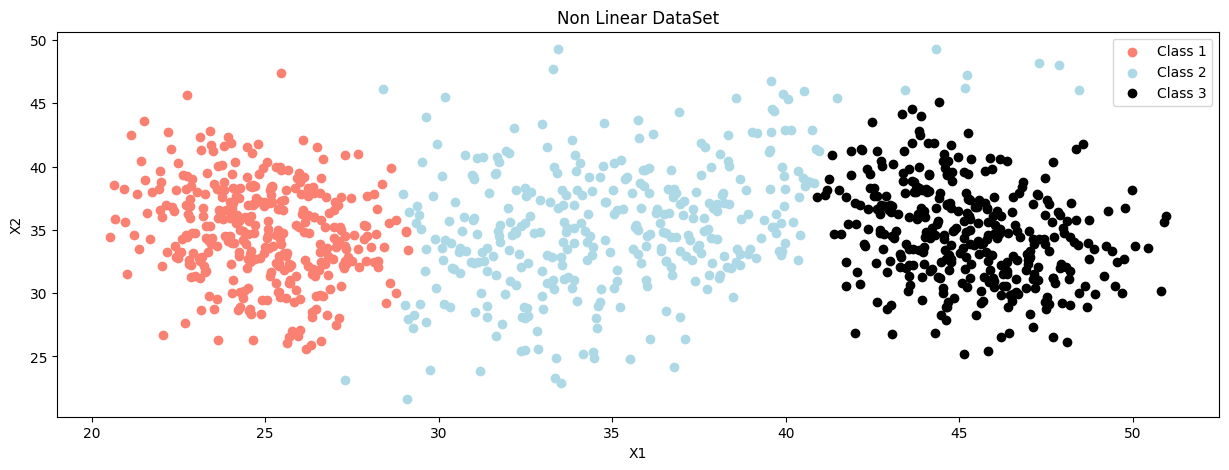

In [4]:
# Create another figure
plt.figure(figsize=(15, 5))

plt.scatter(df_Nonlinear_train.X1[df_Nonlinear_train.Class==1],
            df_Nonlinear_train.X2[df_Nonlinear_train.Class==1],
            c="salmon")
plt.scatter(df_Nonlinear_train.X1[df_Nonlinear_train.Class==2],
            df_Nonlinear_train.X2[df_Nonlinear_train.Class==2],
            c="lightblue")
plt.scatter(df_Nonlinear_train.X1[df_Nonlinear_train.Class==3],
            df_Nonlinear_train.X2[df_Nonlinear_train.Class==3],
            c="black")

plt.title("Non Linear DataSet")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend(["Class 1", "Class 2","Class 3"]);

In [5]:

#Every time we run it change 
df_linear_train['Class'] -= 1
df_linear_test['Class']-=1

x_linear_train = df_linear_train.iloc[:, [0, 1]].values  
y_linear_train = df_linear_train.iloc[:, 2].values  
x_linear_test = df_linear_test.iloc[:, [0, 1]].values  
y_linear_test = df_linear_test.iloc[:, 2].values


In [6]:
#Every time we run it change 
df_Nonlinear_train['Class'] -= 1
df_Nonlinear_test['Class']-=1

x_Nonlinear_train = df_Nonlinear_train.iloc[:, [0, 1]].values  
y_Nonlinear_train = df_Nonlinear_train.iloc[:, 2].values  
x_Nonlinear_test = df_Nonlinear_test.iloc[:, [0, 1]].values  
y_Nonlinear_test = df_Nonlinear_test.iloc[:, 2].values

In [7]:
def Mean(class_data):
    num_rows = len(class_data)
    num_cols = len(class_data[0])

    column_sums = [0] * num_cols

    for row in class_data:
        for i in range(num_cols):
            column_sums[i] += row[i]

    if num_rows == 0:
        return [None] * num_cols

    return [total_sum / num_rows for total_sum in column_sums]

def covariance_matrix(class_data):
    
    rows=len(class_data)
    mean=Mean(class_data)
    
    covariance=[[0,0],[0,0]]
    for i in range(2):
        for j in range(2):
            for k in range(rows):
                covariance[i][j] += (class_data[k][i] - mean[i]) * (class_data[k][j] - mean[j])
            covariance[i][j]/=(rows-1)

    return covariance
    

def multivariate_gaussian_pdf(x, mean, covariance):
    d = len(mean)
    det_covariance = np.linalg.det(covariance)
    inv_covariance = np.linalg.inv(covariance)
    
    exponent = -0.5 * np.dot(np.dot((x - mean).T, inv_covariance), (x - mean))
    coefficient = 1 / ((2 * 3.141592653589793238462643383279502884197) ** (d / 2) * np.sqrt(det_covariance))
    
    return coefficient * np.exp(exponent)

# Define the Gaussian Naive Bayes Classifier
class GaussianNB:
    def __init__(self):
        self.class_probs = None
        self.class_means = None
        self.class_covariance_bayes = None
        self.class_covariance_naive = None
        self.class_different_covariance_bayes=None
        self.class_different_covariance_naive=None
        self.classes = None

    def fit(self, train_data, train_labels):
        num_classes = len(np.unique(train_labels))
        num_features = train_data.shape[1]
        #print(num_classes)
        
        self.class_priors = np.zeros(num_classes)
        self.class_means = np.zeros((num_classes, num_features))
        self.class_covariance_bayes = np.zeros((num_features, num_features))
        self.class_covariance_naive = np.zeros((num_features, num_features))
        self.class_different_covariance_bayes = np.zeros((num_classes,num_features, num_features))
        self.class_different_covariance_naive = np.zeros((num_classes,num_features, num_features))
        # Calculate class priors and class-wise statistics
        for c in range(num_classes):
            class_data = train_data[train_labels == c]
            
            self.class_priors[c] = len(class_data) / len(train_data)
            self.class_means[c] = np.mean(class_data,axis=0)
            
            self.class_different_covariance_bayes[c]=covariance_matrix(class_data)
            self.class_different_covariance_naive[c]=self.class_different_covariance_bayes[c]
            self.class_different_covariance_naive[c][0][1]=0
            self.class_different_covariance_naive[c][1][0]=0
            self.class_covariance_bayes += self.class_different_covariance_bayes[c]
            self.class_covariance_naive += self.class_different_covariance_naive[c]
        
        self.class_covariance_bayes /= num_classes
        self.class_covariance_naive /= num_classes
        
        

    def predict(self, test_data):
        num_classes = len(self.class_priors)
        num_samples = test_data.shape[0]
        
        predictions = np.zeros(num_samples, dtype=int)
        
        for i in range(num_samples):
            sample = test_data[i]
            likelihoods = np.zeros(num_classes)
            
            for c in range(num_classes):
                likelihoods[c] = multivariate_gaussian_pdf(sample, self.class_means[c], self.class_covariance_bayes)
            
            posteriors = likelihoods * self.class_priors
            predictions[i] = np.argmax(posteriors)
        
        return predictions
    
    def mean(self):
        return self.class_means

In [8]:
classifier_linear = GaussianNB()  
classifier_linear.fit(x_linear_train, y_linear_train)  
y_linear_pred=classifier_linear.predict(x_linear_test)

In [9]:
print("Bayes Classifier Covariance with same Covariance")
print(classifier_linear.class_covariance_bayes)
print()
print("Bayes Classifier Covariance with different Covariance")
print(classifier_linear.class_different_covariance_bayes)
print()
print("Naive Classifier Covariance with same Covariance")
print(classifier_linear.class_covariance_naive)
print()
print("Naive Classifier Covariance with different Covariance")
print(classifier_linear.class_different_covariance_naive)


Bayes Classifier Covariance with same Covariance
[[1.90382408 0.78017207]
 [0.78017207 1.65560336]]

Bayes Classifier Covariance with different Covariance
[[[2.28905549 1.19108343]
  [1.19108343 2.05082813]]

 [[1.6984963  0.84440234]
  [0.84440234 1.7089945 ]]

 [[1.72392046 0.30503042]
  [0.30503042 1.20698747]]]

Naive Classifier Covariance with same Covariance
[[1.90382408 0.        ]
 [0.         1.65560336]]

Naive Classifier Covariance with different Covariance
[[[2.28905549 0.        ]
  [0.         2.05082813]]

 [[1.6984963  0.        ]
  [0.         1.7089945 ]]

 [[1.72392046 0.        ]
  [0.         1.20698747]]]


In [10]:
classifier_Nonlinear = GaussianNB()  
classifier_Nonlinear.fit(x_Nonlinear_train, y_Nonlinear_train)  
y_Nonlinear_pred=classifier_Nonlinear.predict(x_Nonlinear_test)

In [11]:
print("Bayes Classifier Covariance with same Covariance")
print(classifier_Nonlinear.class_covariance_bayes)
print()
print("Bayes Classifier Covariance with different Covariance")
print(classifier_Nonlinear.class_different_covariance_bayes)
print()
print("Naive Classifier Covariance with same Covariance")
print(classifier_Nonlinear.class_covariance_naive)
print()
print("Naive Classifier Covariance with different Covariance")
print(classifier_Nonlinear.class_different_covariance_naive)

Bayes Classifier Covariance with same Covariance
[[ 6.91708761  1.1839817 ]
 [ 1.1839817  18.60480381]]

Bayes Classifier Covariance with different Covariance
[[[ 3.40027962 -1.42979773]
  [-1.42979773 14.62554028]]

 [[13.02759584  7.2534    ]
  [ 7.2534     26.50782575]]

 [[ 4.32338738 -2.27165718]
  [-2.27165718 14.68104542]]]

Naive Classifier Covariance with same Covariance
[[ 6.91708761  0.        ]
 [ 0.         18.60480381]]

Naive Classifier Covariance with different Covariance
[[[ 3.40027962  0.        ]
  [ 0.         14.62554028]]

 [[13.02759584  0.        ]
  [ 0.         26.50782575]]

 [[ 4.32338738  0.        ]
  [ 0.         14.68104542]]]


In [12]:
confusion_matrix_linear=confusion_matrix(y_linear_test, y_linear_pred)
print("Linear Data Set")
print(confusion_matrix_linear)

Linear Data Set
[[100   0   0]
 [  0 100   0]
 [  0   0 100]]


In [13]:
confusion_matrix_Nonlinear=confusion_matrix(y_Nonlinear_test, y_Nonlinear_pred)
print("NonLinear Data Set")
print(confusion_matrix_Nonlinear)

NonLinear Data Set
[[100   0   0]
 [  8  88   4]
 [  0   0 100]]


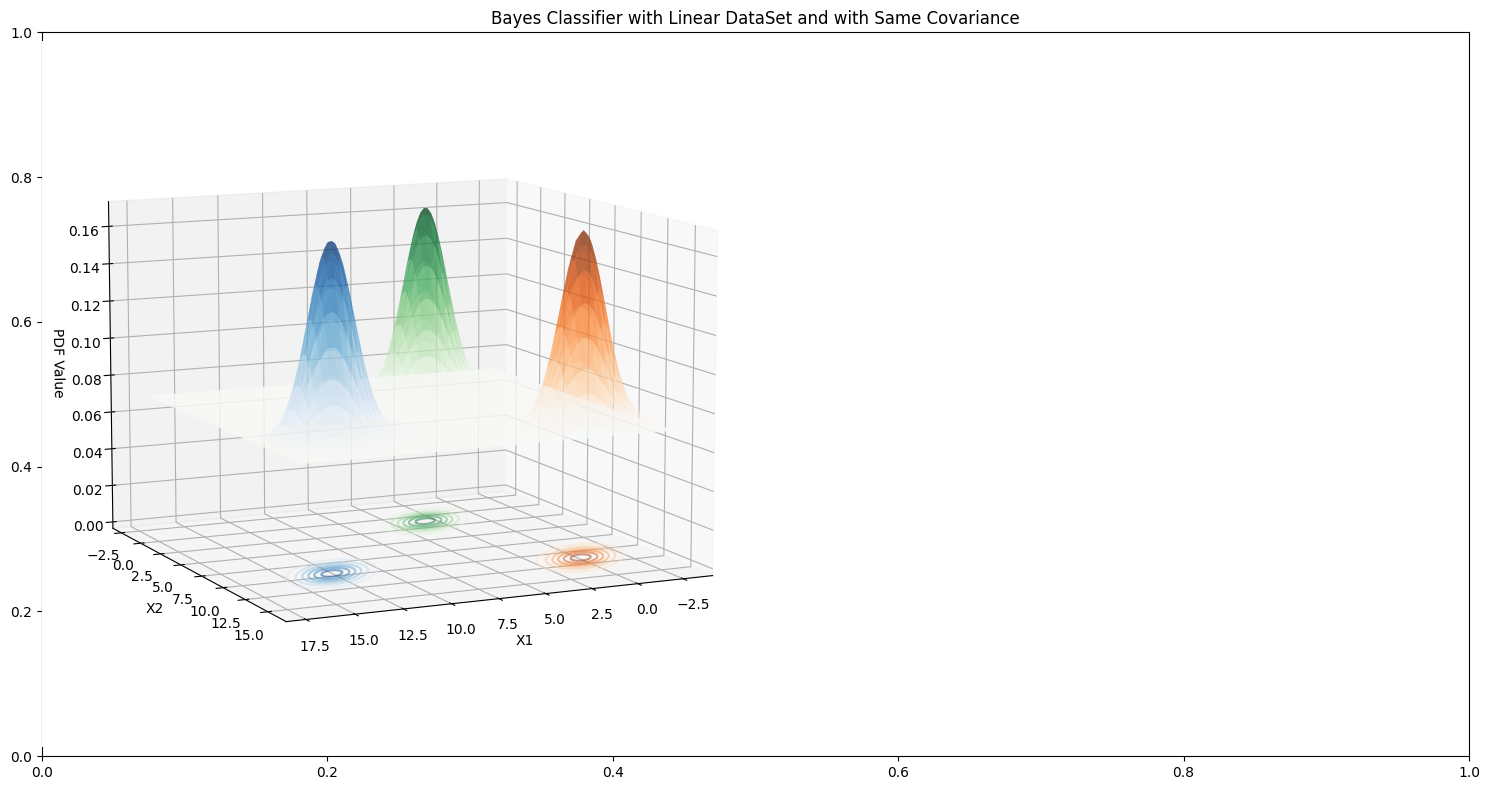

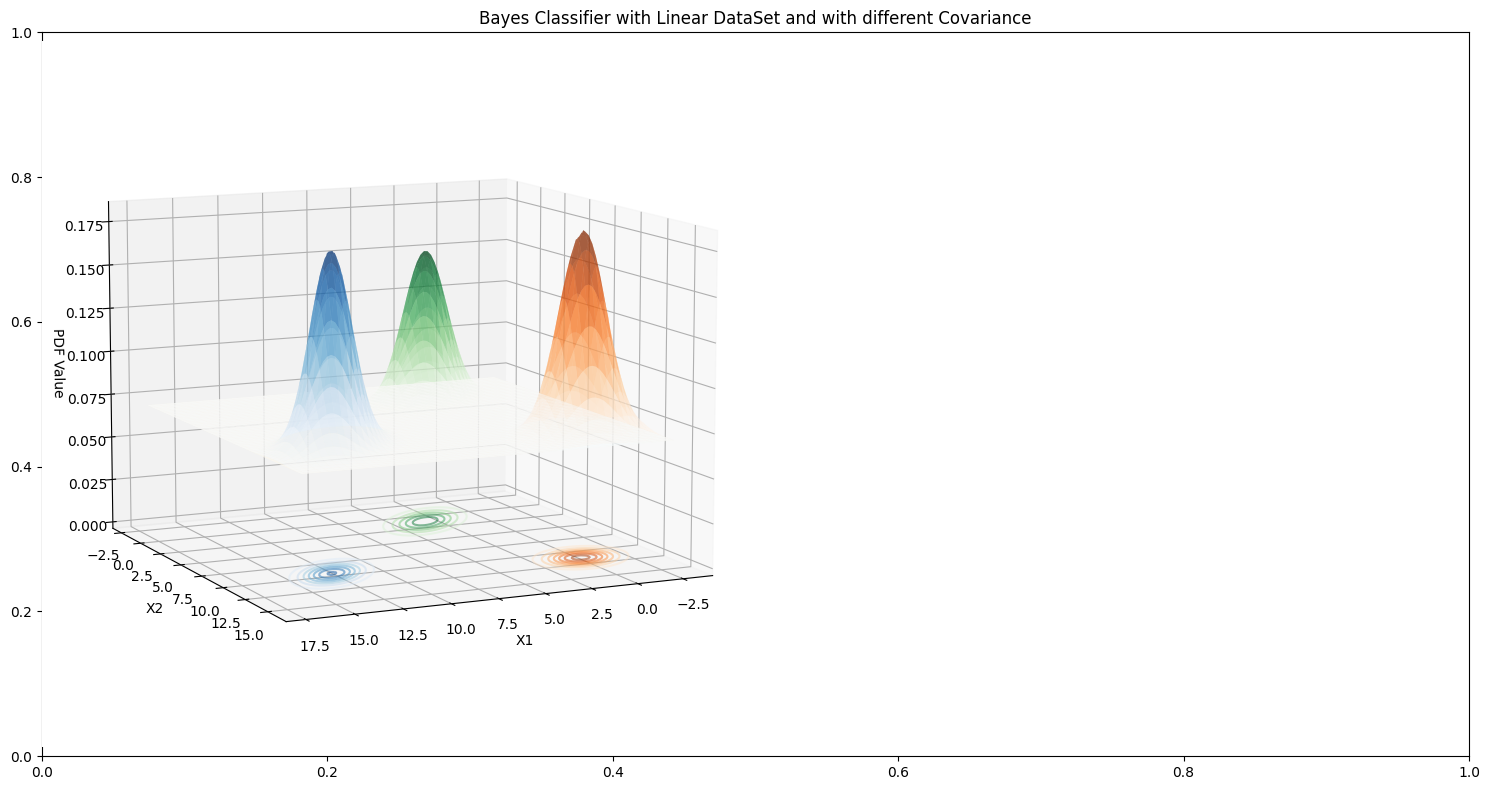

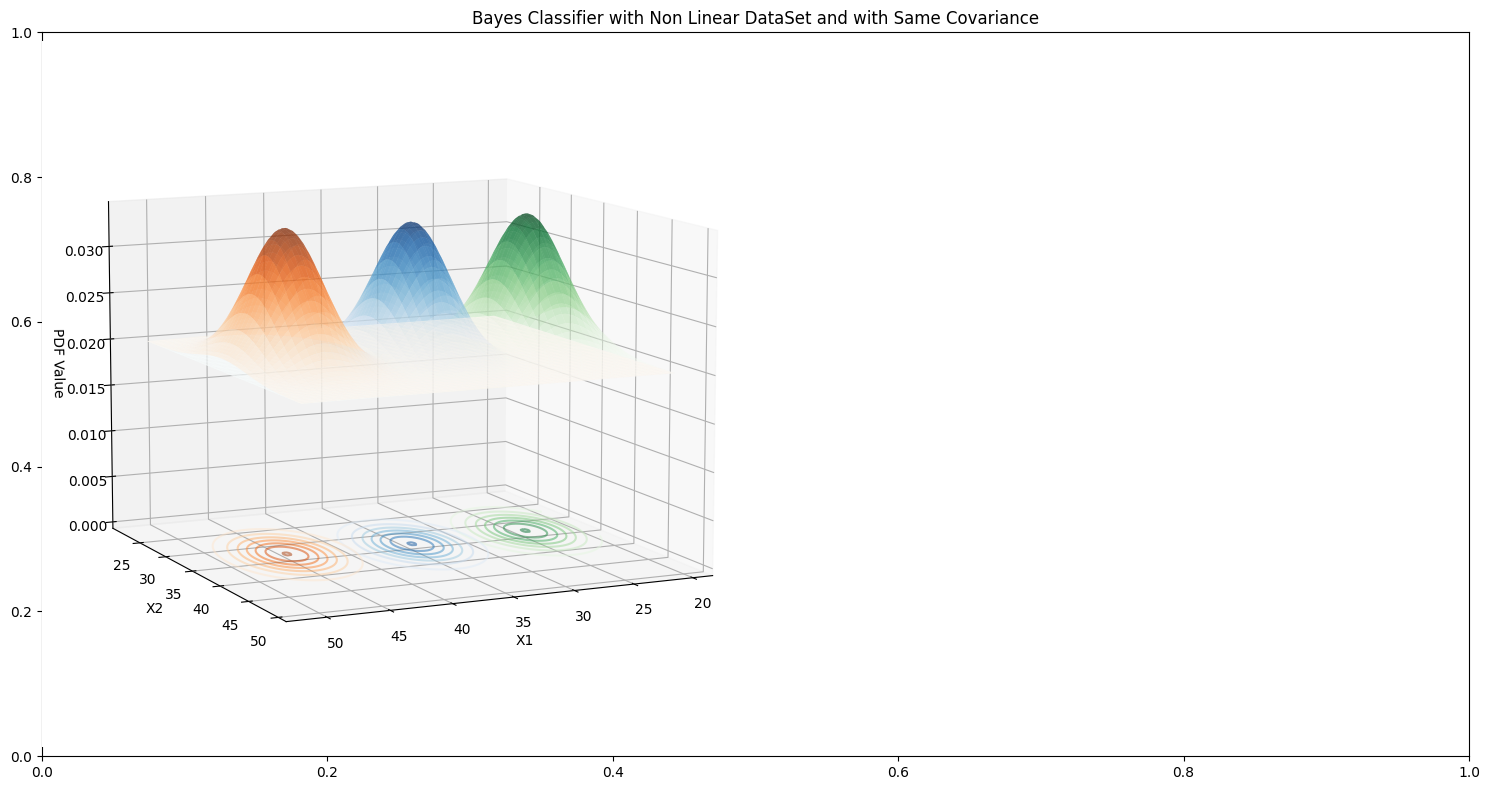

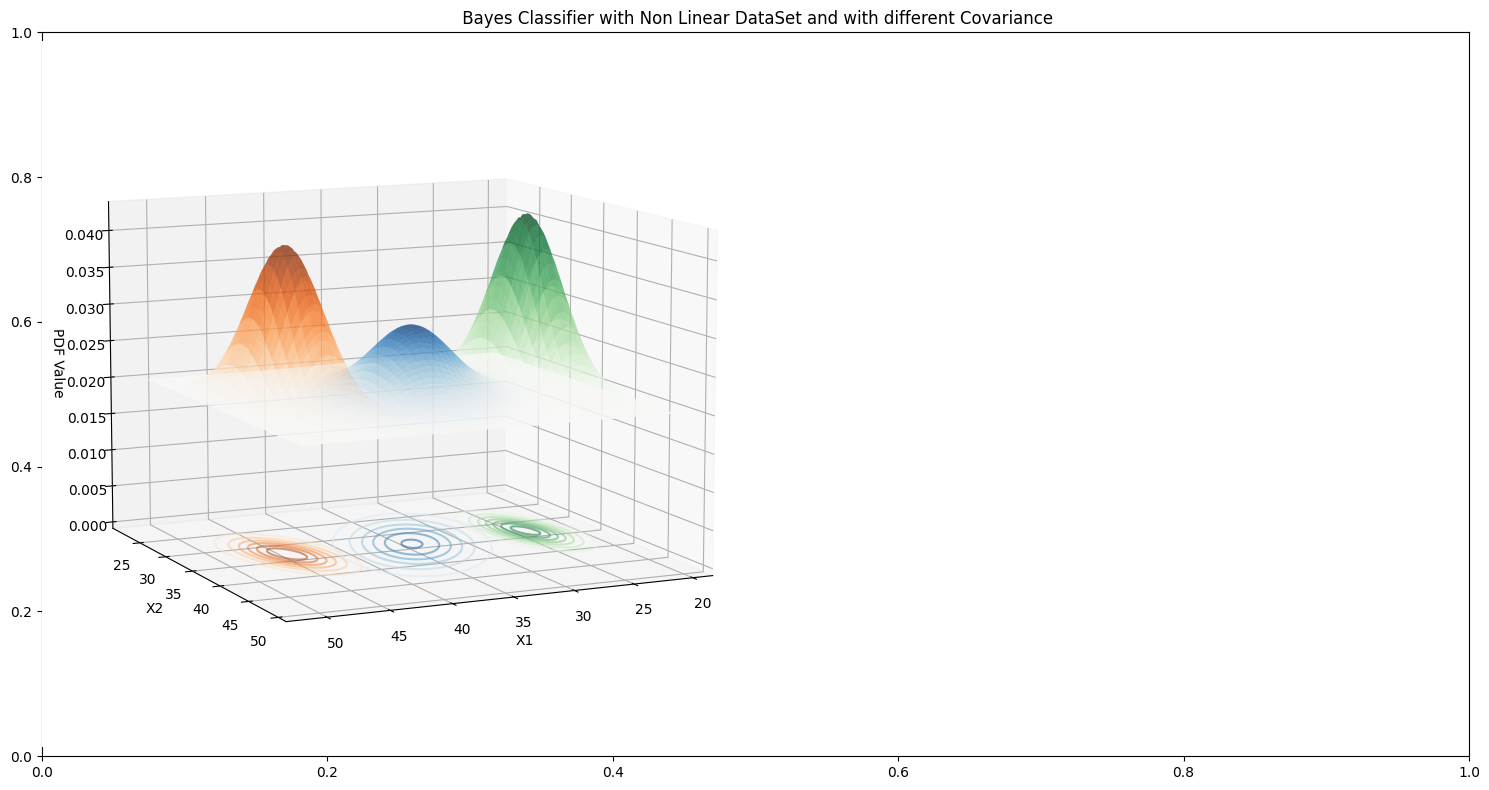

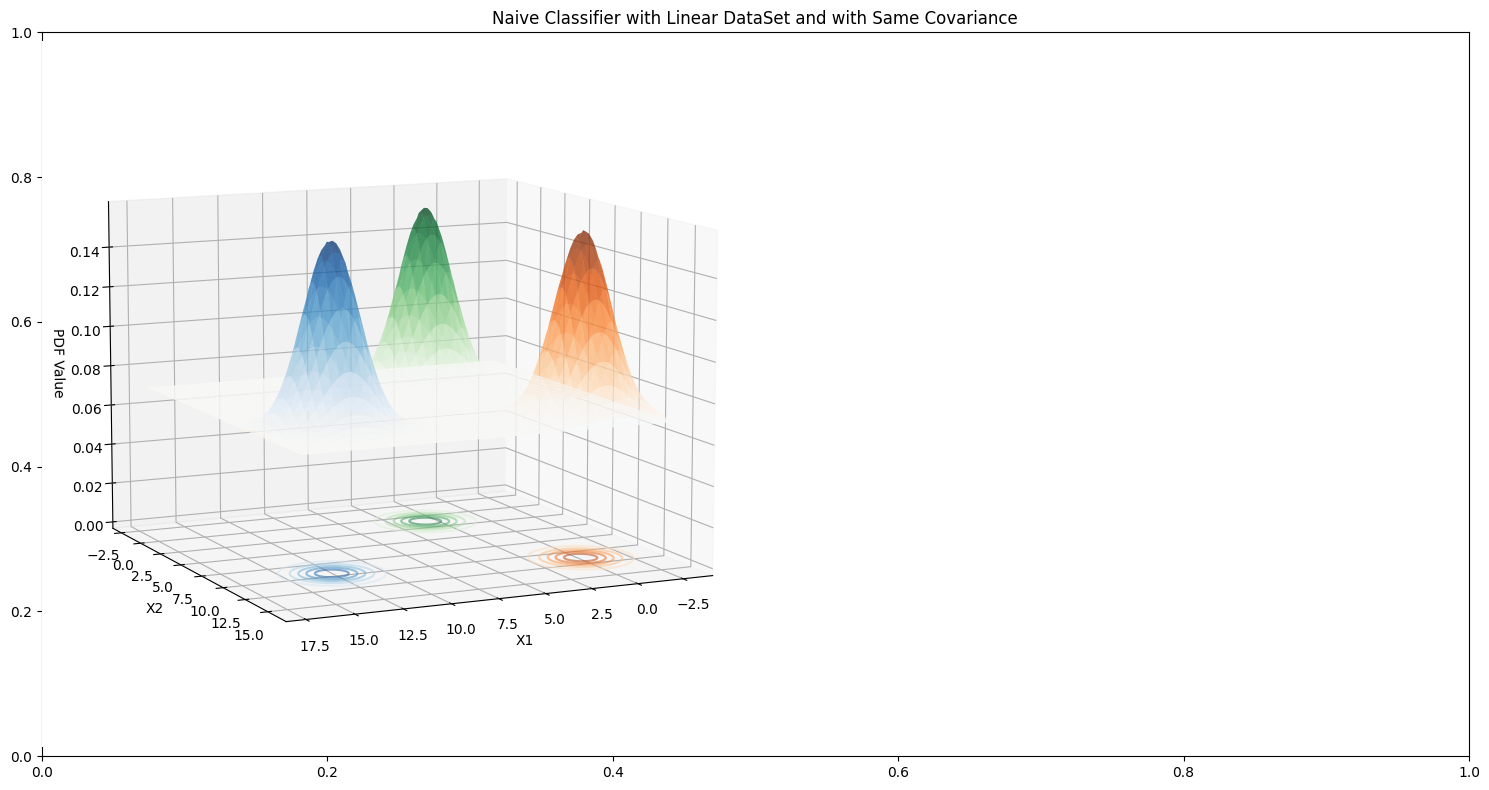

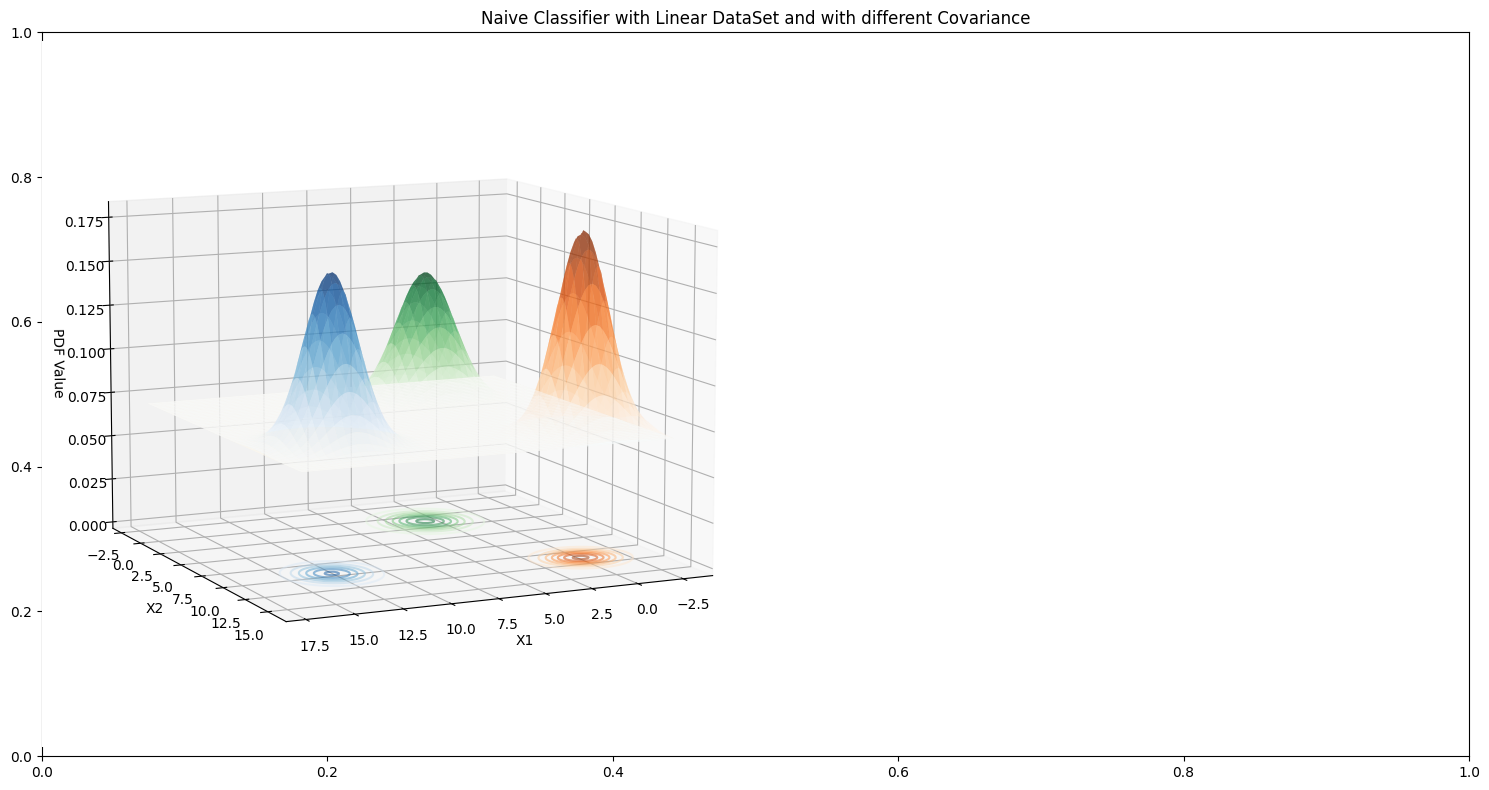

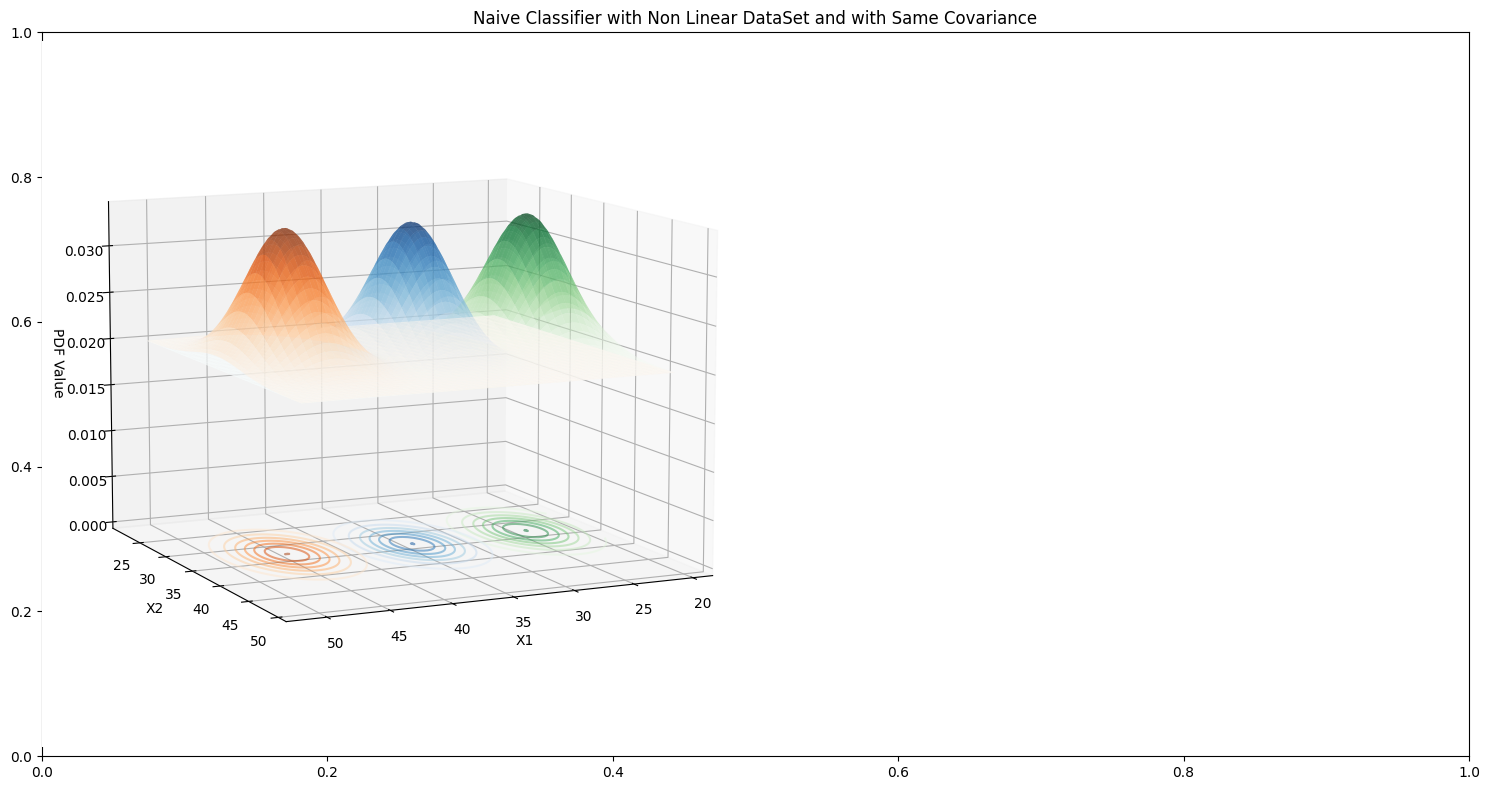

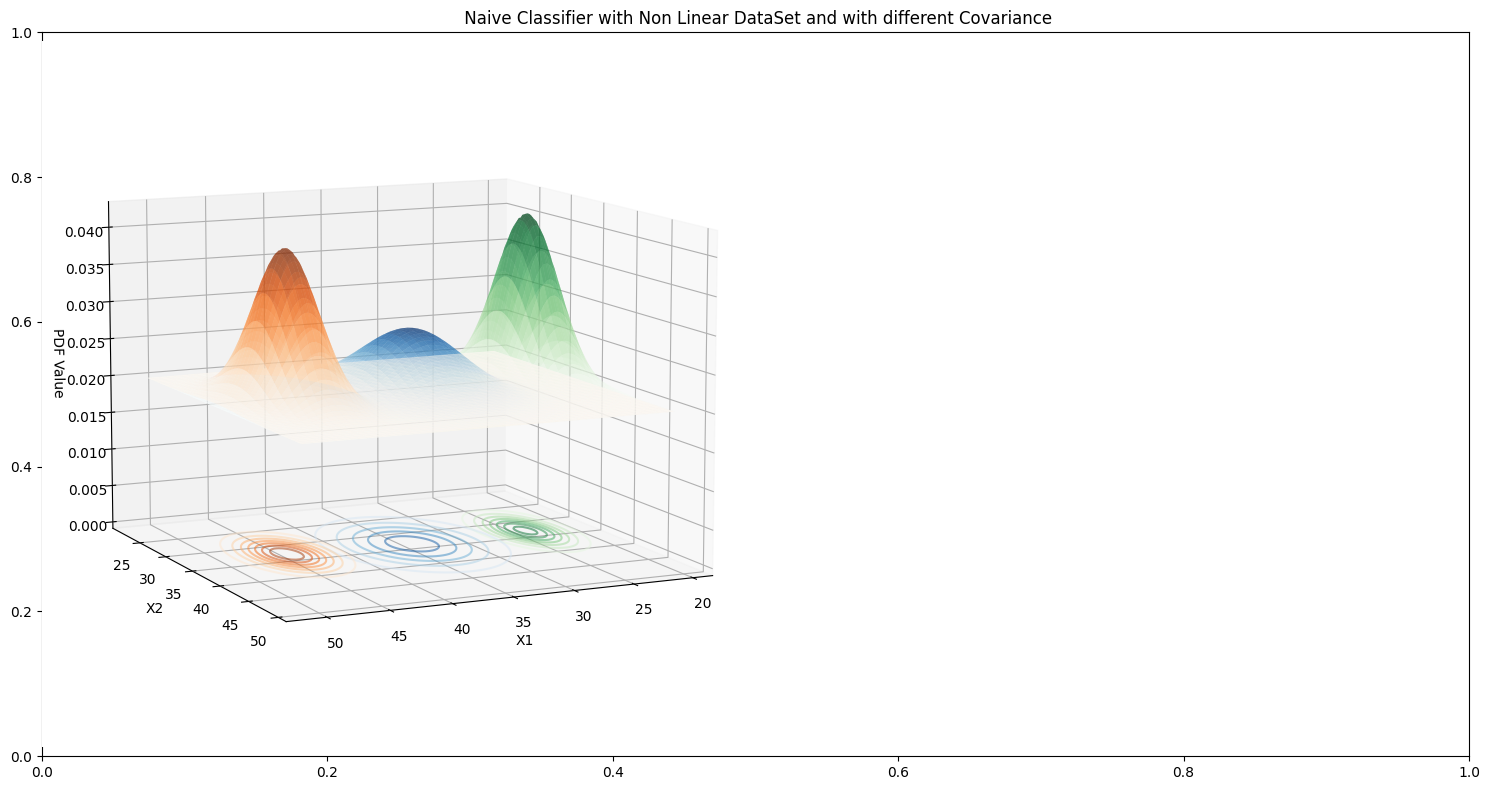

In [14]:
from scipy.stats import multivariate_normal
def plot1(c,s,d,classifier): 
    if(s=="linear"):
        X = df_linear_train[['X1', 'X2']].values
        labels = df_linear_train['Class'].values
    else:
        X = df_Nonlinear_train[['X1', 'X2']].values
        labels = df_Nonlinear_train['Class'].values
      
    
    class_means = classifier.class_means
    if(c=="Bayes" and d=="different"):
        class_covariances = classifier.class_different_covariance_bayes
    elif(c=="Bayes" and d=="same"):
        class_covariances = classifier.class_covariance_bayes
    elif(c=="Naive" and d=="different"):
        class_covariances = classifier.class_different_covariance_naive
    else:
        class_covariances = classifier.class_covariance_naive
        
        
    # Calculate means and covariances for each class
    

    x, y = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                       np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

    xy = np.column_stack((x.ravel(), y.ravel()))

    fig = plt.figure(figsize=(15, 8))
    
    if(c=="Bayes" and d=="same"  and s=="linear"):
        plt.title("Bayes Classifier with Linear DataSet and with Same Covariance")  
    elif(c=="Bayes" and d=="same" and s=="Nonlinear"):
        plt.title("Bayes Classifier with Non Linear DataSet and with Same Covariance")
    elif(c=="Bayes" and d=="different" and s=="linear"):
        plt.title("Bayes Classifier with Linear DataSet and with different Covariance")
    elif(c=="Bayes" and d=="different" and s=="Nonlinear"):
        plt.title(" Bayes Classifier with Non Linear DataSet and with different Covariance")
    elif(c=="Naive" and d=="same"  and s=="linear"):
        plt.title("Naive Classifier with Linear DataSet and with Same Covariance")  
    elif(c=="Naive" and d=="same" and s=="Nonlinear"):
        plt.title("Naive Classifier with Non Linear DataSet and with Same Covariance")
    elif(c=="Naive" and d=="different" and s=="linear"):
        plt.title("Naive Classifier with Linear DataSet and with different Covariance")
    elif(c=="Naive" and d=="different" and s=="Nonlinear"):
        plt.title(" Naive Classifier with Non Linear DataSet and with different Covariance")

    # Plot 1
    
    pdfs1=[]
    ax1 = fig.add_subplot(121, projection='3d')
    for i in range(len(class_means)):
        if(d=="different"):
            pdf_values = multivariate_normal(class_means[i], class_covariances[i]).pdf(xy)
        else:
            pdf_values = multivariate_normal(class_means[i], class_covariances).pdf(xy)
        pdf_values = pdf_values.reshape(x.shape)
        
        pdfs1.append(pdf_values)

    if(s=="linear"):
        ax1.plot_surface(x, y, pdfs1[0]+0.07, cmap='Greens', alpha=0.5, label="Class 1")
        ax1.plot_surface(x, y, pdfs1[1]+0.07, cmap='Blues', alpha=0.5, label="Class 2")
        ax1.plot_surface(x, y, pdfs1[2]+0.07, cmap='Oranges', alpha=0.5, label="Class 3")

    else:
        ax1.plot_surface(x, y, pdfs1[0]+0.02, cmap='Greens', alpha=0.5, label="1")
        ax1.plot_surface(x, y, pdfs1[1]+0.02, cmap='Blues', alpha=0.5, label="2")
        ax1.plot_surface(x, y, pdfs1[2]+0.02, cmap='Oranges', alpha=0.5, label="3")
    
    
    #ax1.legend(['Class 1', 'Class 2', 'Class 3'])
    ax1.set_xlabel('X1')
    ax1.set_ylabel('X2')
    ax1.set_zlabel('PDF Value')
    ax1.view_init(azim=65, elev=10)
    #ax1.set_title('Plot 1')

    #ax3 = fig.add_subplot(122)
    
    pdf3=[]
    for i in range(len(class_means)):
        if(d=="different"):
            pdf_values = multivariate_normal(class_means[i], class_covariances[i]).pdf(xy)
        else:
            pdf_values = multivariate_normal(class_means[i], class_covariances).pdf(xy)
            
        pdf_values = pdf_values.reshape(x.shape)
        pdf3.append(pdf_values)
        
        
        
    ax1.contour(x, y, pdf3[0],zdir='z',offset=0, cmap='Greens', alpha=0.5)
    ax1.contour(x, y, pdf3[1],zdir='z',offset=0, cmap='Blues', alpha=0.5)
    ax1.contour(x, y, pdf3[2],zdir='z',offset=0, cmap='Oranges', alpha=0.5)
#     ax1.set_xlabel('X1')
#     ax3.set_ylabel('X2')
#     ax3.set_title('Plot 2')
    #ax2.view_init(azim=75, elev=20)
    plt.tight_layout()  # Adjust layout to prevent overlapping
    
    plt.show()


plot1("Bayes","linear","same",classifier_linear)
plot1("Bayes","linear","different",classifier_linear)
plot1("Bayes","Nonlinear","same",classifier_Nonlinear)
plot1("Bayes","Nonlinear","different",classifier_Nonlinear)
plot1("Naive","linear","same",classifier_linear)
plot1("Naive","linear","different",classifier_linear)
plot1("Naive","Nonlinear","same",classifier_Nonlinear)
plot1("Naive","Nonlinear","different",classifier_Nonlinear)


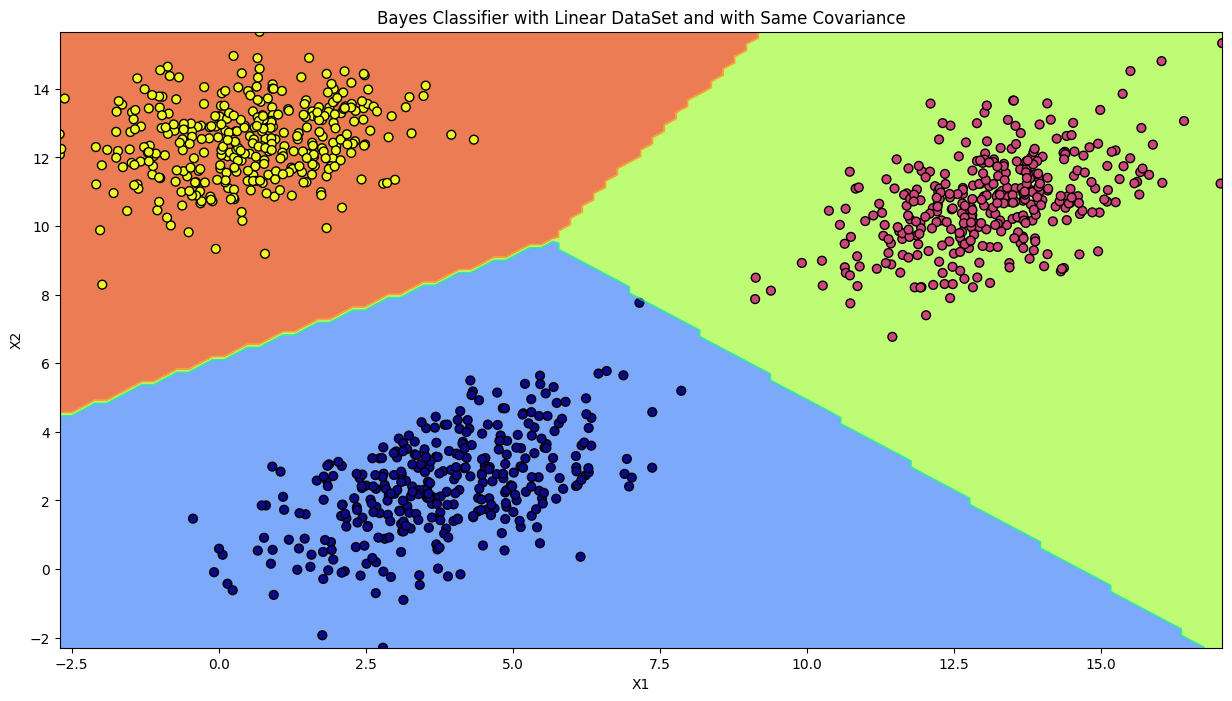

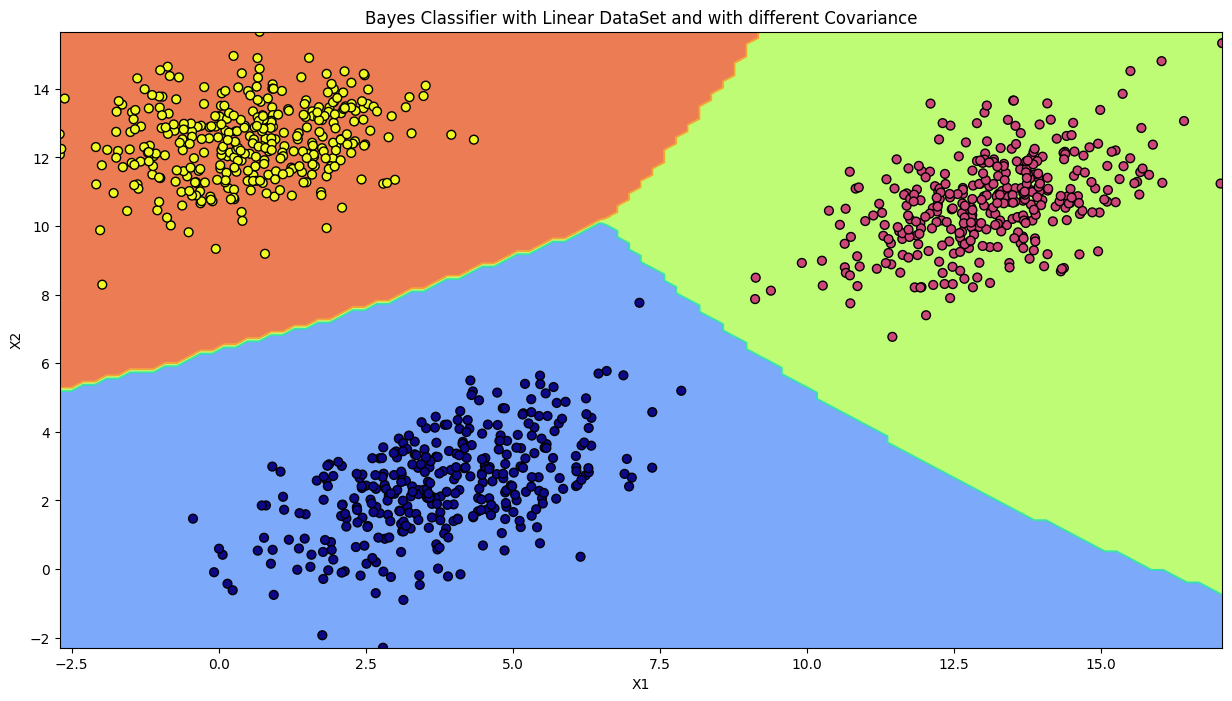

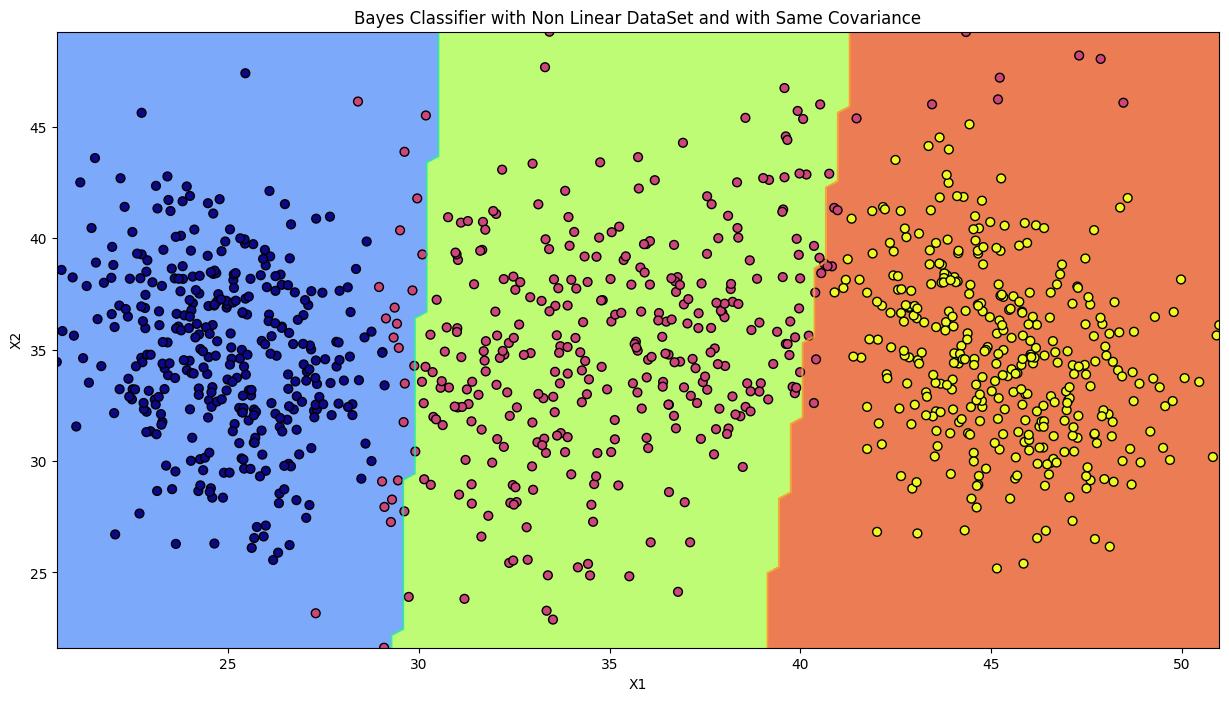

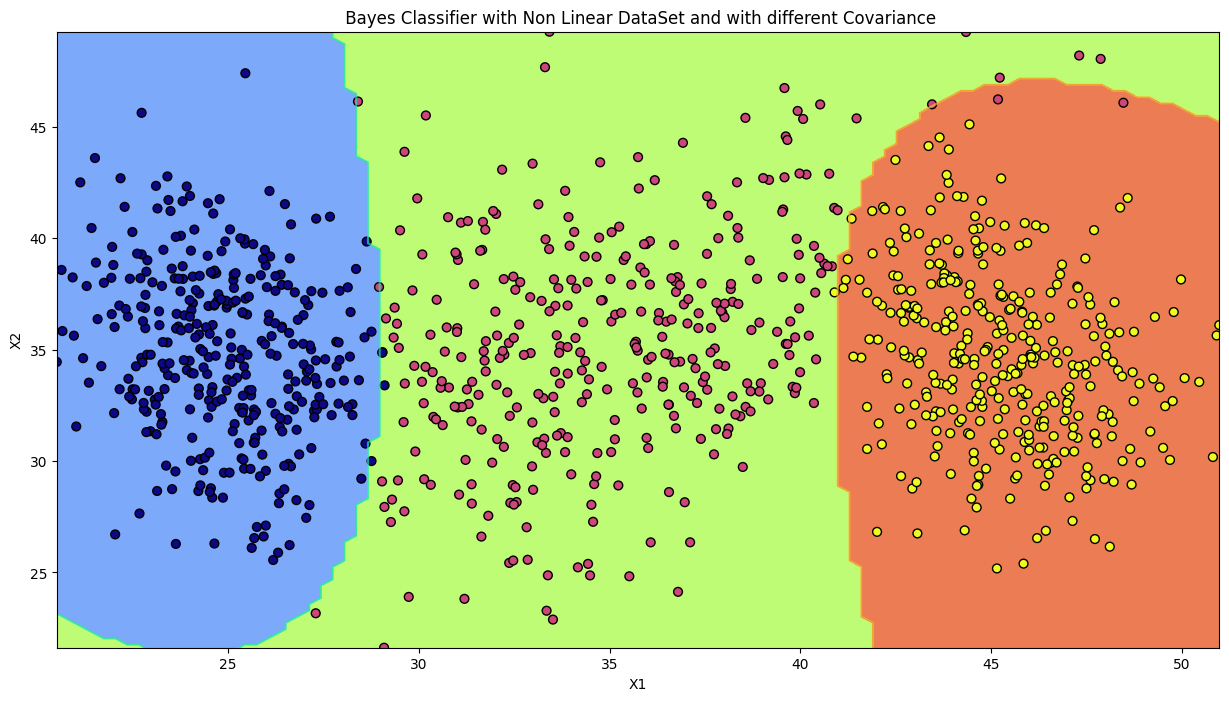

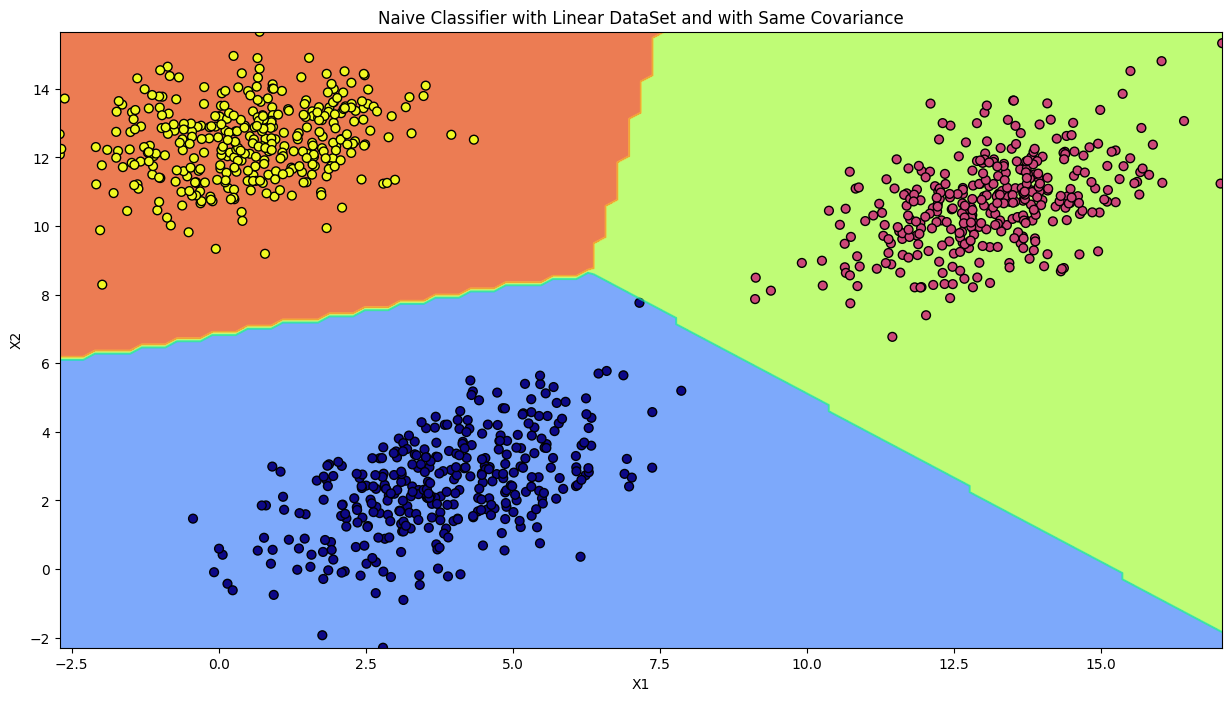

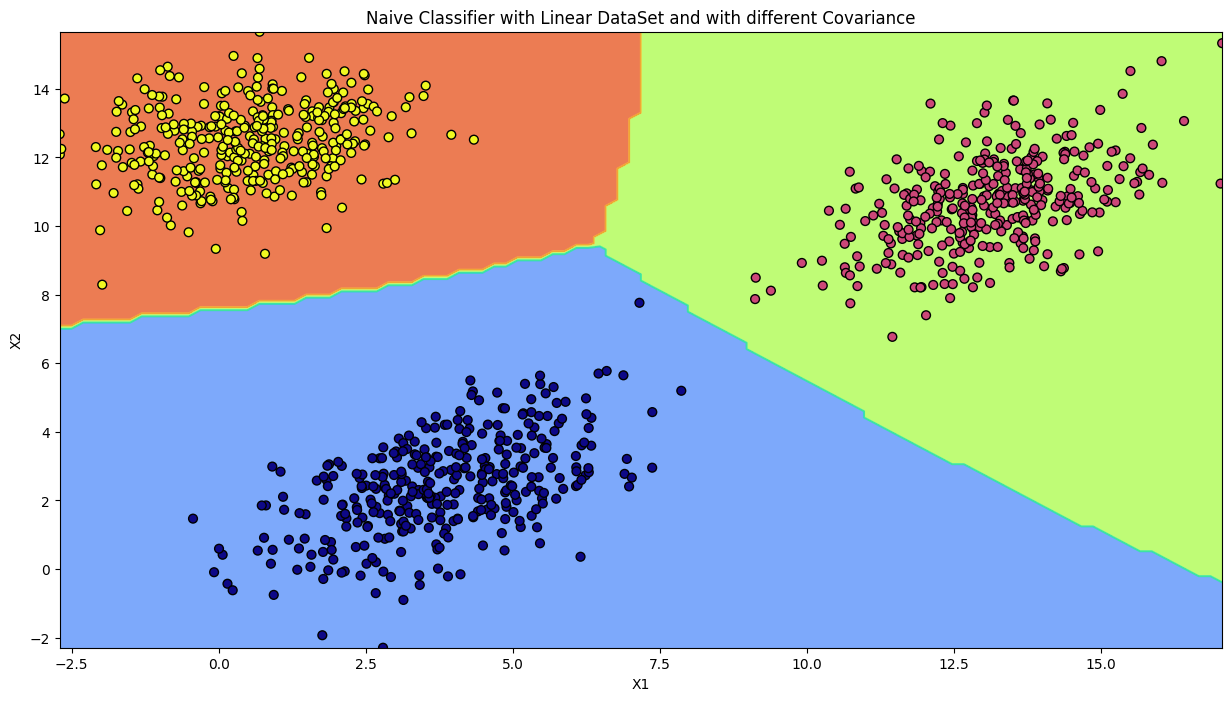

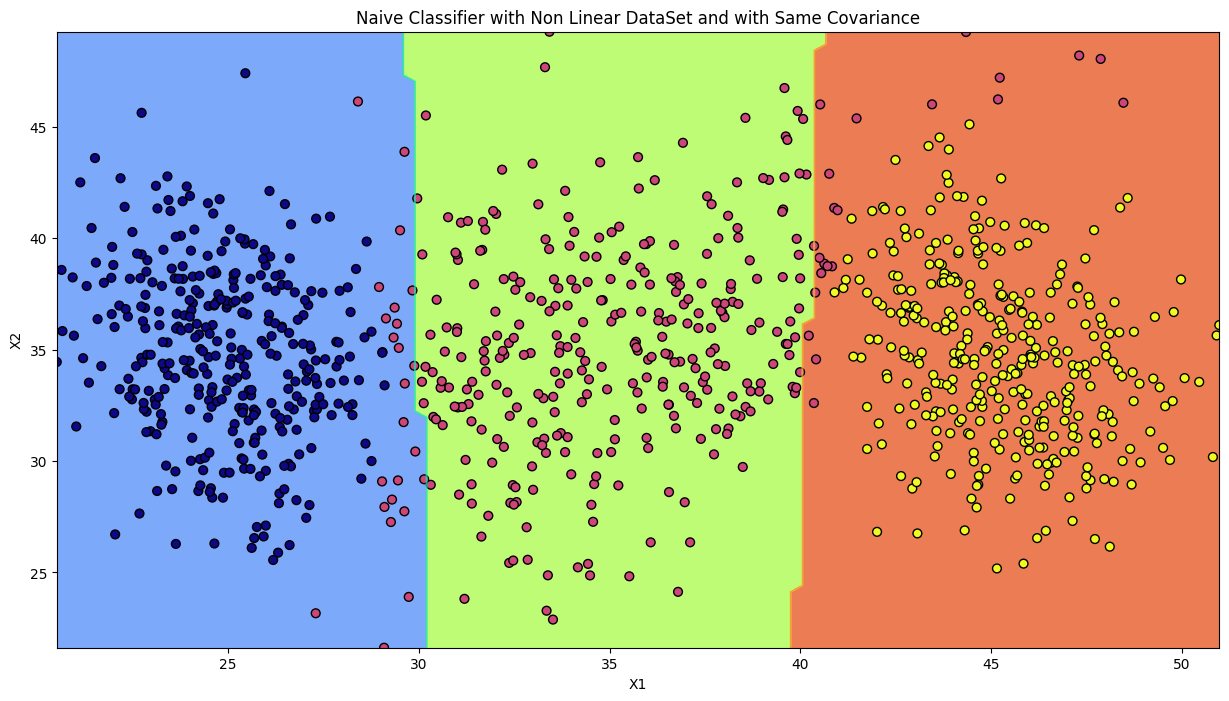

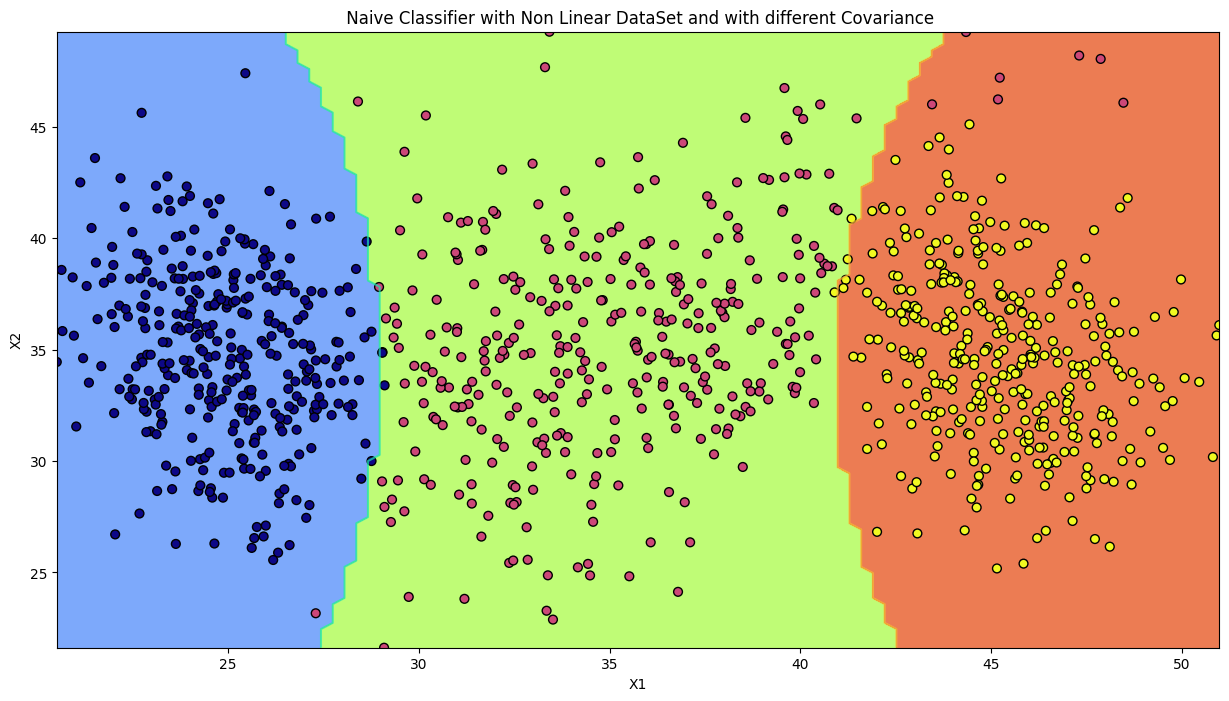

In [15]:
from scipy.stats import multivariate_normal
def decision_boundary(x, y, means, covariances,d):
    if(d=="different"):
        pdfs = [multivariate_normal(mean=means[i], cov=covariances[i]).pdf([x, y]) for i in range(len(means))]
    else:
        pdfs = [multivariate_normal(mean=means[i], cov=covariances).pdf([x, y]) for i in range(len(means))]
    
    return np.argmax(pdfs)


def plot4(c,s,d,classifier): 
    if(s=="linear"):
        X = df_linear_train[['X1', 'X2']].values
        y = df_linear_train['Class'].values
    else:
        X = df_Nonlinear_train[['X1', 'X2']].values
        y = df_Nonlinear_train['Class'].values
        
    class_means = classifier.class_means
    if(c=="Bayes" and d=="different"):
        class_covariances = classifier.class_different_covariance_bayes
    elif(c=="Bayes" and d=="same"):
        class_covariances = classifier.class_covariance_bayes
    elif(c=="Naive" and d=="different"):
        class_covariances = classifier.class_different_covariance_naive
    else:
        class_covariances = classifier.class_covariance_naive
        
           

    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                       np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

    #xy = np.column_stack((x.ravel(), y.ravel()))
    pdf = np.array([decision_boundary(x, y, class_means, class_covariances,d) for x, y in zip(xx.ravel(), yy.ravel())])
    pdf = pdf.reshape(xx.shape)
    #print(pdf)
    plt.figure(figsize=(15, 8))
    plt.contourf(xx, yy,pdf, alpha=0.7, levels=np.arange(len(class_means) + 1) - 0.5, cmap='turbo')
    plt.contour(xx, yy,pdf, alpha=0.7, levels=np.arange(len(class_means) + 1) - 0.5, cmap='turbo')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='plasma', edgecolors='k', linewidth=1)
    plt.xlabel('X1')
    plt.ylabel('X2')

    if(c=="Bayes" and d=="same"  and s=="linear"):
        plt.title("Bayes Classifier with Linear DataSet and with Same Covariance")  
    elif(c=="Bayes" and d=="same" and s=="Nonlinear"):
        plt.title("Bayes Classifier with Non Linear DataSet and with Same Covariance")
    elif(c=="Bayes" and d=="different" and s=="linear"):
        plt.title("Bayes Classifier with Linear DataSet and with different Covariance")
    elif(c=="Bayes" and d=="different" and s=="Nonlinear"):
        plt.title(" Bayes Classifier with Non Linear DataSet and with different Covariance")
    elif(c=="Naive" and d=="same"  and s=="linear"):
        plt.title("Naive Classifier with Linear DataSet and with Same Covariance")  
    elif(c=="Naive" and d=="same" and s=="Nonlinear"):
        plt.title("Naive Classifier with Non Linear DataSet and with Same Covariance")
    elif(c=="Naive" and d=="different" and s=="linear"):
        plt.title("Naive Classifier with Linear DataSet and with different Covariance")
    elif(c=="Naive" and d=="different" and s=="Nonlinear"):
        plt.title(" Naive Classifier with Non Linear DataSet and with different Covariance")

    plt.show()
        

plot4("Bayes","linear","same",classifier_linear)
plot4("Bayes","linear","different",classifier_linear)
plot4("Bayes","Nonlinear","same",classifier_Nonlinear)
plot4("Bayes","Nonlinear","different",classifier_Nonlinear)
plot4("Naive","linear","same",classifier_linear)
plot4("Naive","linear","different",classifier_linear)
plot4("Naive","Nonlinear","same",classifier_Nonlinear)
plot4("Naive","Nonlinear","different",classifier_Nonlinear)






